In [121]:
# Подготовка Данных и Окружения к Анализу

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from math import ceil, isnan

np.seterr(divide='ignore', invalid='ignore')
data = pd.read_csv('exams.csv', engine='python')
data['summary score'] = data['math score'] + data['writing score'] + data['reading score']
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,summary score
0,male,group A,high school,standard,completed,67,67,63,197
1,female,group D,some high school,free/reduced,none,40,59,55,154
2,male,group E,some college,free/reduced,none,59,60,50,169
3,male,group B,high school,standard,none,77,78,68,223
4,male,group E,associate's degree,standard,completed,78,73,68,219
...,...,...,...,...,...,...,...,...,...
995,male,group C,high school,standard,none,73,70,65,208
996,male,group D,associate's degree,free/reduced,completed,85,91,92,268
997,female,group C,some high school,free/reduced,none,32,35,41,108
998,female,group C,some college,standard,none,73,74,82,229


In [122]:
parsed_data = {}

for quality in data:
    for i in range(len(data[quality])):
        if quality not in parsed_data.keys():
            parsed_data[quality] = {
                'values': [],
                'times': []
            }
        if data[quality][i] not in parsed_data[quality]['values']:
            parsed_data[quality]['values'].append(data[quality][i])
            parsed_data[quality]['times'].append(1)
        else:
            parsed_data[quality]['times'][parsed_data[quality]['values'].index(data[quality][i])] += 1
    parsed_data[quality]['times'] = sorted(parsed_data[quality]['times'], key=lambda x: parsed_data[quality]['values'][parsed_data[quality]['times'].index(x)])
    parsed_data[quality]['values'] = sorted(parsed_data[quality]['values'])
new_data = pd.DataFrame(index=['values', 'times'], columns=parsed_data.keys())
for quality in parsed_data:
    new_data[quality]['values'] = parsed_data[quality]['values']
    new_data[quality]['times'] = parsed_data[quality]['times']
new_data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,summary score
values,"[female, male]","[group A, group B, group C, group D, group E]","[associate's degree, bachelor's degree, high s...","[free/reduced, standard]","[completed, none]","[13, 23, 25, 26, 28, 29, 30, 31, 32, 33, 34, 3...","[27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 3...","[23, 24, 26, 27, 28, 30, 31, 32, 33, 34, 35, 3...","[65, 86, 88, 89, 94, 95, 96, 97, 98, 100, 102,..."
times,"[483, 517]","[79, 205, 323, 262, 131]","[203, 112, 202, 70, 222, 191]","[348, 652]","[335, 665]","[1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 11, 11, 11, ...","[1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 4, 4, ...","[1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


In [123]:
# (№1) Вывести описательные статистики
# 1) Среднее значение (X с чертой)
# 2) Медиана
# 3) Выбросы - минимальные и максимальные значения признака (X(1), X(n))
# 4) Мода - наиболее часто встречающееся в наборе значение
# 5) Размах - разность между выбросами
# 6) Стандартное отклонение (sigma)
# 7) Дисперсия
# 8) Квантили (уровня 0.1, 0.25, 0.5, 0.75, 0.95)

def my_round(a, lim):
    if round(a) == lim:
        return ceil(a)
    return round(a)

binaries = [
    'gender',
    'race/ethnicity',
    'parental level of education',
    'lunch',
    'test preparation course',
]
df_data = dict.fromkeys([
    'mean', 'min', 'max', 'most frequent', 'distance', 'median', 'standard deviation', 'variation',
    'quantile 0.1', 'quantile 0.25', 'quantile 0.5', 'quantile 0.75', 'quantile 0.95'
])
result_data = pd.DataFrame(index=df_data.keys())
N = 1000
for quality in data:
    data_to_insert = pd.DataFrame(index=df_data.keys())
    if quality in binaries:
        types = []
        if quality == 'gender':
            types = ['female', 'male']
        elif quality == 'race/ethnicity':
            types = ['group A', 'group B', 'group C', 'group D', 'group E']
        elif quality == 'parental level of education':
            types = ['some high school', 'high school', 'some college', "associate's degree", "bachelor's degree", "master's degree"]
        elif quality == 'lunch':
            types = ['free/reduced', 'standard']
        elif quality == 'test preparation course':
            types = ['none', 'completed']
        new_data = np.array(list(map(lambda a: types.index(a), data[quality])))
        qs = np.quantile(new_data, q=[0.1, 0.25, 0.5, 0.75, 0.95])
        qs = np.array(list(map(lambda a: types[int(a)], qs)))
        data_to_insert.insert(0, quality, [
            types[my_round(sum(new_data) / N, len(types))],
            types[0],
            types[1],
            parsed_data[quality]['values'][parsed_data[quality]['times'].index(max(parsed_data[quality]['times']))],
            'N/A',
            types[int(np.median(new_data))],
            np.std(new_data),
            np.var(new_data),
            qs[0], qs[1], qs[2], qs[3], qs[4]
        ])
    else:
        qs = np.quantile(data[quality], q=[0.1, 0.25, 0.5, 0.75, 0.95])
        data_to_insert.insert(0, quality, [
            data[quality].mean(),
            min(data[quality]),
            max(data[quality]),
            parsed_data[quality]['values'][parsed_data[quality]['times'].index(max(parsed_data[quality]['times']))],
            max(data[quality]) - min(data[quality]),
            np.median(data[quality]),
            data[quality].std(),
            data[quality].var(),
            qs[0], qs[1], qs[2], qs[3], qs[4]
        ])
    result_data = pd.concat([result_data, data_to_insert], axis=1)
result_data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,summary score
mean,male,group C,some college,standard,none,66.396000,69.002000,67.738000,203.136000
min,female,group A,some high school,free/reduced,none,13.000000,27.000000,23.000000,65.000000
max,male,group B,high school,standard,completed,100.000000,100.000000,100.000000,300.000000
most frequent,male,group C,some college,standard,none,59.000000,82.000000,78.000000,227.000000
distance,N/A,N/A,N/A,N/A,N/A,87.000000,73.000000,77.000000,235.000000
median,male,group C,some college,standard,none,66.500000,70.000000,68.000000,202.000000
standard deviation,0.499711,1.131848,1.498062,0.476336,0.47199,15.402871,14.737272,15.600985,43.542732
variation,0.249711,1.281079,2.244191,0.226896,0.222775,237.248432,217.187183,243.390747,1895.969473
quantile 0.1,female,group B,some high school,free/reduced,none,47.000000,49.000000,47.000000,144.000000
quantile 0.25,female,group B,high school,free/reduced,none,56.000000,60.000000,58.000000,175.750000


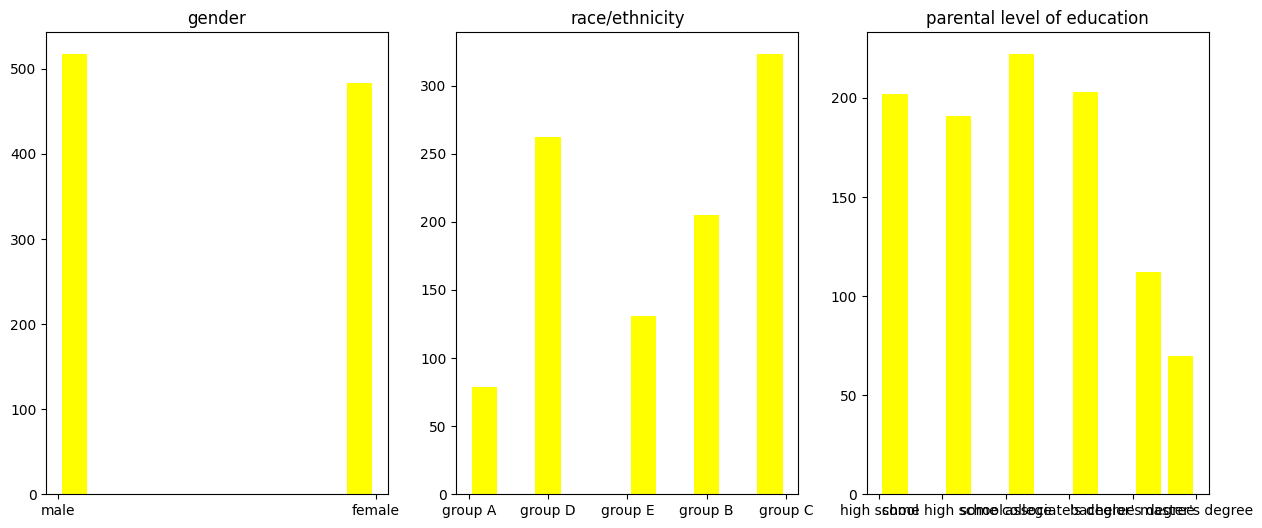

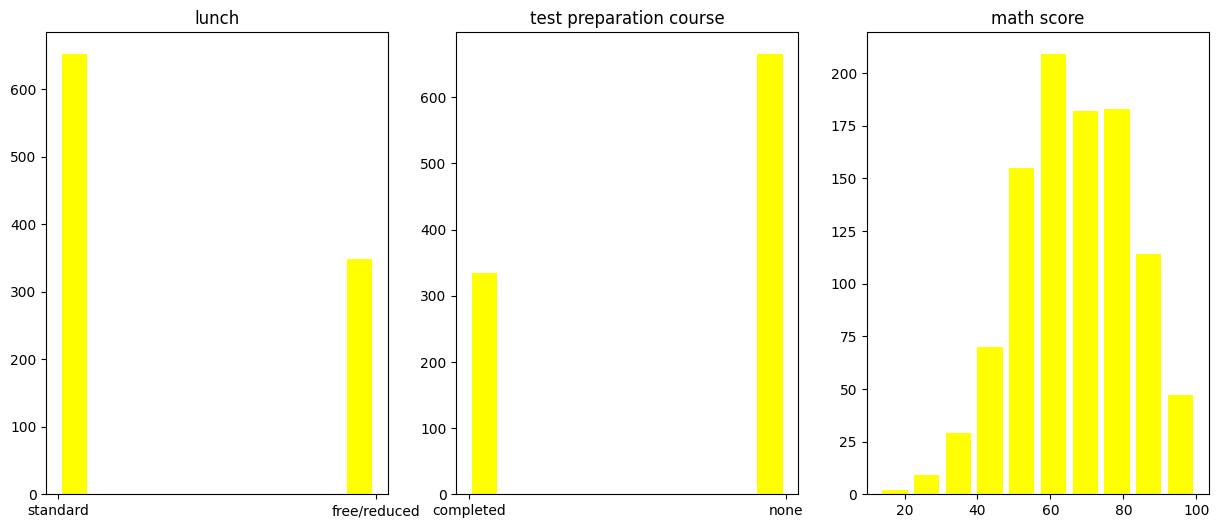

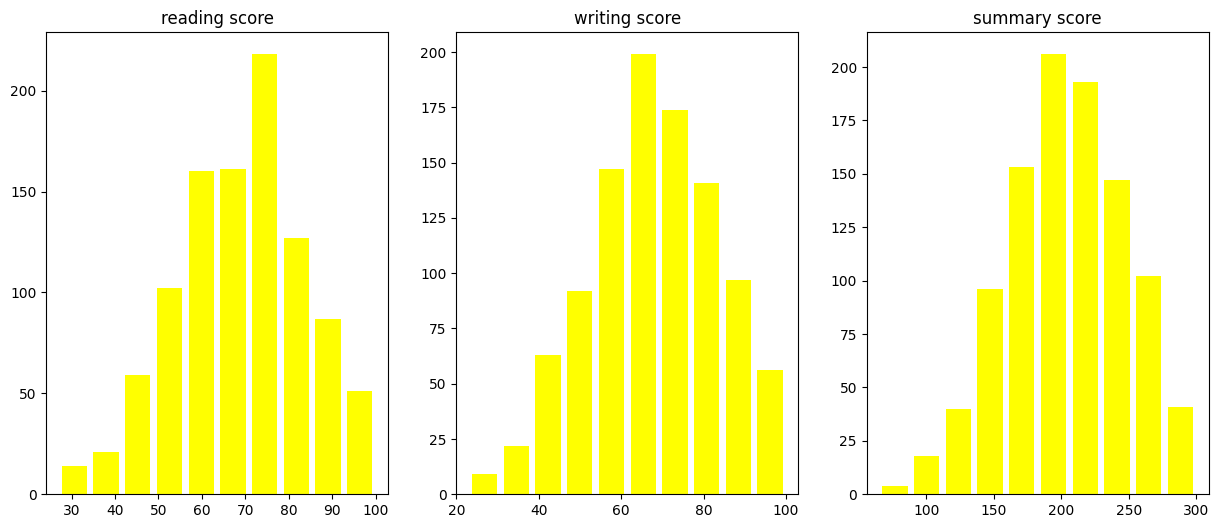

In [124]:
# (№2) Построить гистограмму для каждого признака
counter = 0
hist_count = 3
for quality in data:
    if not counter % hist_count:
        plt.subplots(1, hist_count, figsize=(15,6))
    plt.subplot(1, hist_count, counter % hist_count + 1)
    plt.hist(data[quality], align='mid', rwidth=0.8, color='yellow', stacked=True, histtype='bar')
    plt.title(quality)
    counter += 1

math score Отвергаем
reading score Отвергаем
writing score Отвергаем
summary score Отвергаем


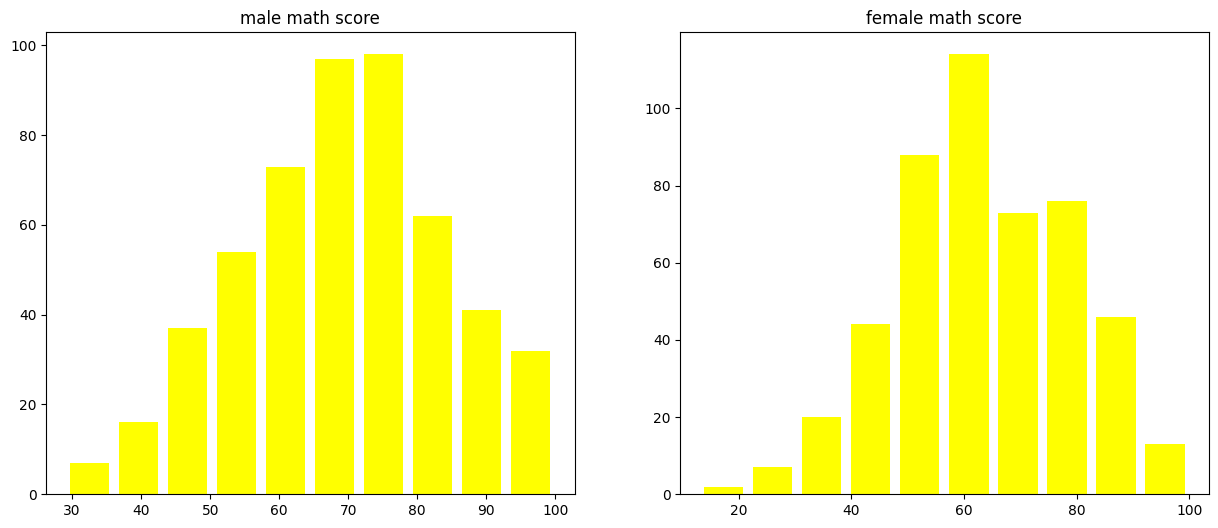

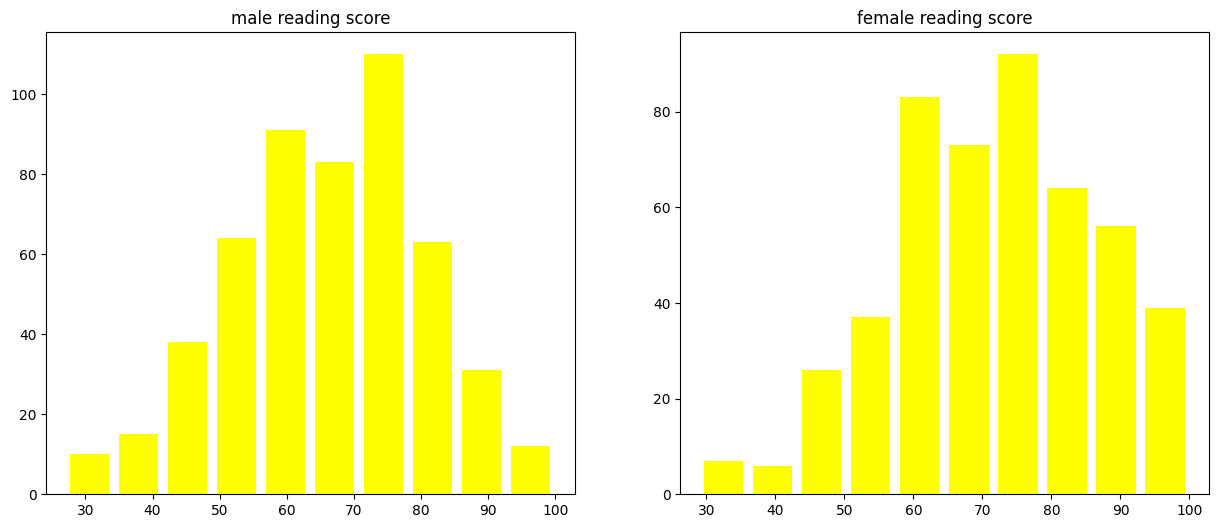

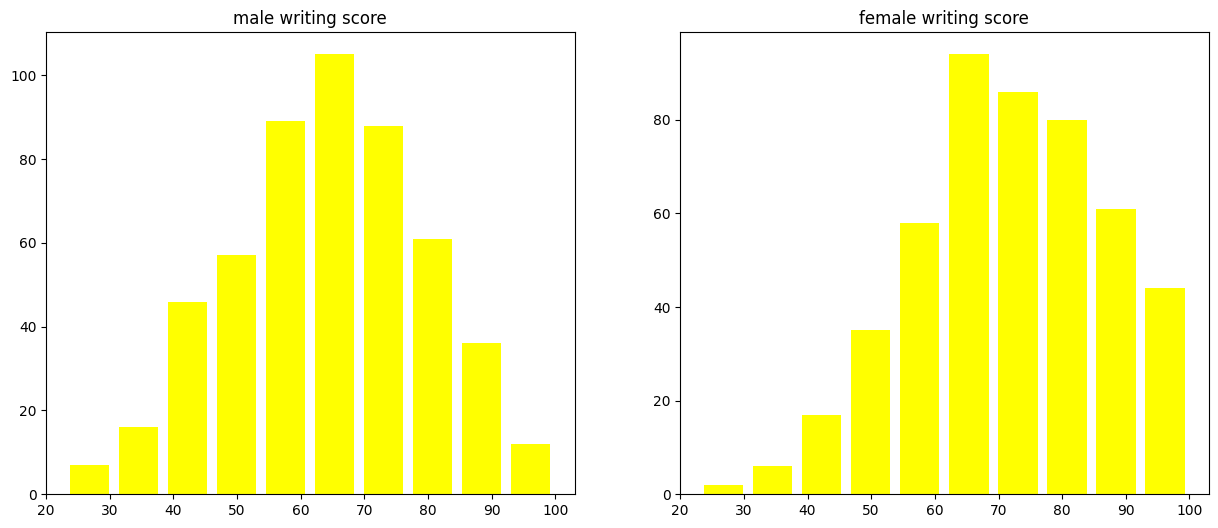

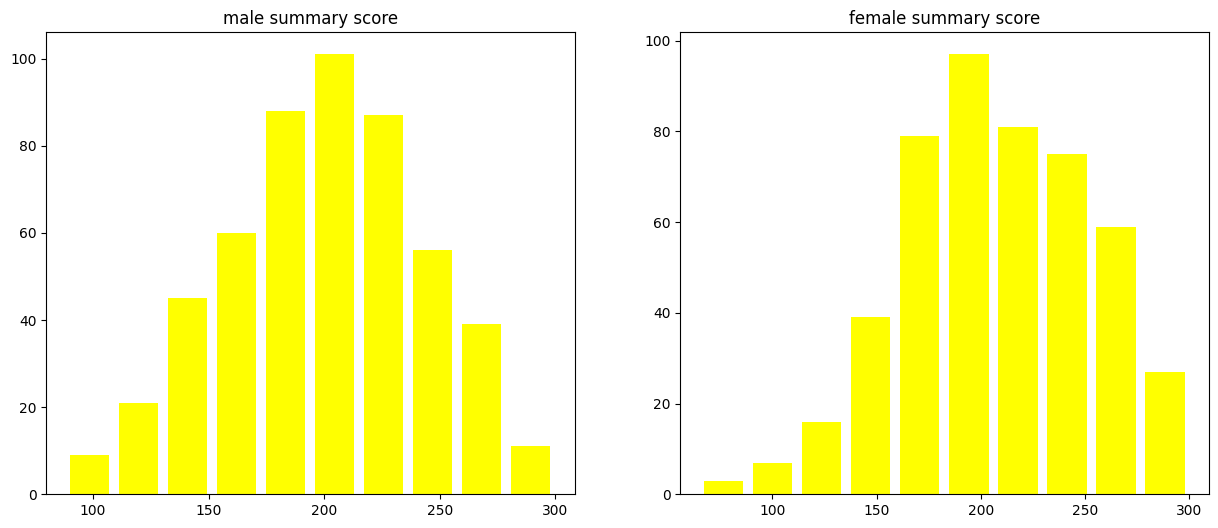

In [125]:
# (№2a) Построить гистограмму для признака с баллами в зависимости от пола

qualities = ['math score', 'reading score', 'writing score', 'summary score']
male_scores = data[data['gender'] == 'male']
female_scores = data[data['gender'] == 'female']
for quality in qualities:
    table = pd.DataFrame(index=['male', 'female', 'total'], columns=parsed_data[quality]['values'])
    table_exp = pd.DataFrame(index=['male', 'female'])
    plt.subplots(1, 2, figsize=(15,6))
    plt.subplot(1, 2, 1)
    plt.hist(male_scores[quality], align='mid', rwidth=0.8, color='yellow', stacked=True, histtype='bar')
    plt.title(f'male {quality}')
    plt.subplot(1, 2, 2)
    plt.hist(female_scores[quality], align='mid', rwidth=0.8, color='yellow', stacked=True, histtype='bar')
    plt.title(f'female {quality}')
    # Проверить гипотезу об одинаковой распределенности (с помощью критерия хи-квадрат)
    for i in range(len(male_scores[quality])):
        if isnan(table[male_scores[quality].iloc[i]]['male']):
            table[male_scores[quality].iloc[i]]['male'] = 1
            if isnan(table[male_scores[quality].iloc[i]]['female']):
                table[male_scores[quality].iloc[i]]['total'] = 1
            continue
        table[male_scores[quality].iloc[i]]['male'] += 1
        table[male_scores[quality].iloc[i]]['total'] += 1
    for i in range(len(female_scores[quality])):
        if isnan(table[female_scores[quality].iloc[i]]['female']):
            table[female_scores[quality].iloc[i]]['female'] = 1
            if isnan(table[female_scores[quality].iloc[i]]['male']):
                table[female_scores[quality].iloc[i]]['total'] = 1
            else:
                table[female_scores[quality].iloc[i]]['total'] += 1
            continue
        table[female_scores[quality].iloc[i]]['female'] += 1
        table[female_scores[quality].iloc[i]]['total'] += 1
    table = table.replace(np.nan, 0)
    temp = pd.DataFrame.from_dict({'male': len(male_scores[quality]),'female': len(female_scores[quality]), 'total': 1000}, columns=['total'], orient='index')
    table = pd.concat([table, temp], axis=1)
    table
    table_exp = pd.DataFrame(index=table.index, columns=table.columns)
    chi2_test = 0
    for column in table_exp:
        for i in range(len(table_exp) - 1):
            table_exp[column][i] = table[column]['total'] * table['total']['male' if i == 0 else 'female'] / table['total']['total']
            chi2_test += (table[column][i] - table_exp[column][i])**2 / table_exp[column][i]
    quantile = stats.chi2.ppf(1 - .05, df=(1000-1)*(2-1)) # уровня 0.05
    print(quality, 'Отвергаем' if chi2_test <= quantile else 'Не отвергаем')

math score Отвергаем
reading score Отвергаем
writing score Отвергаем
summary score Отвергаем


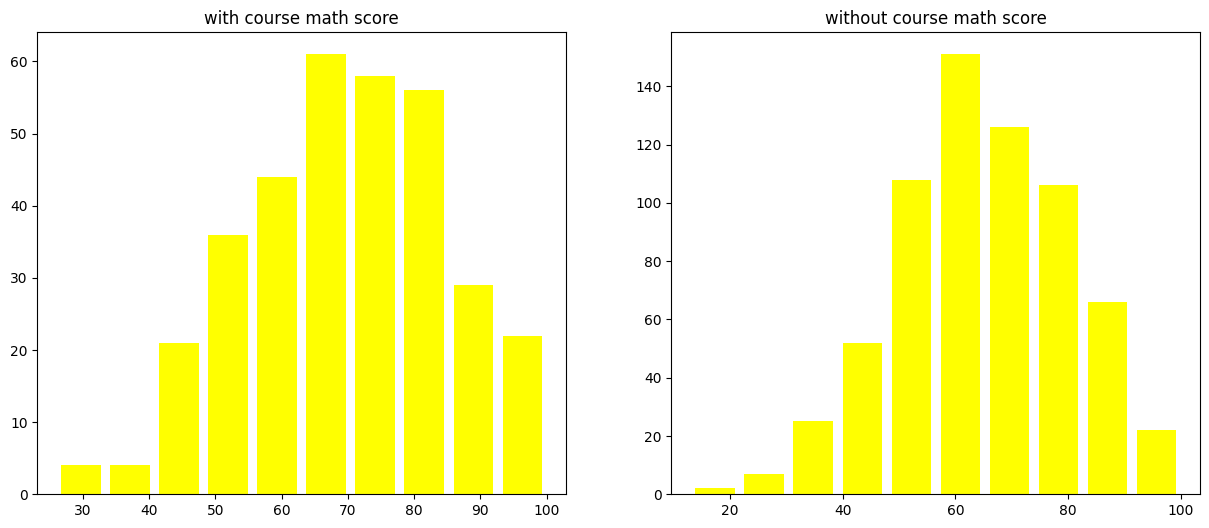

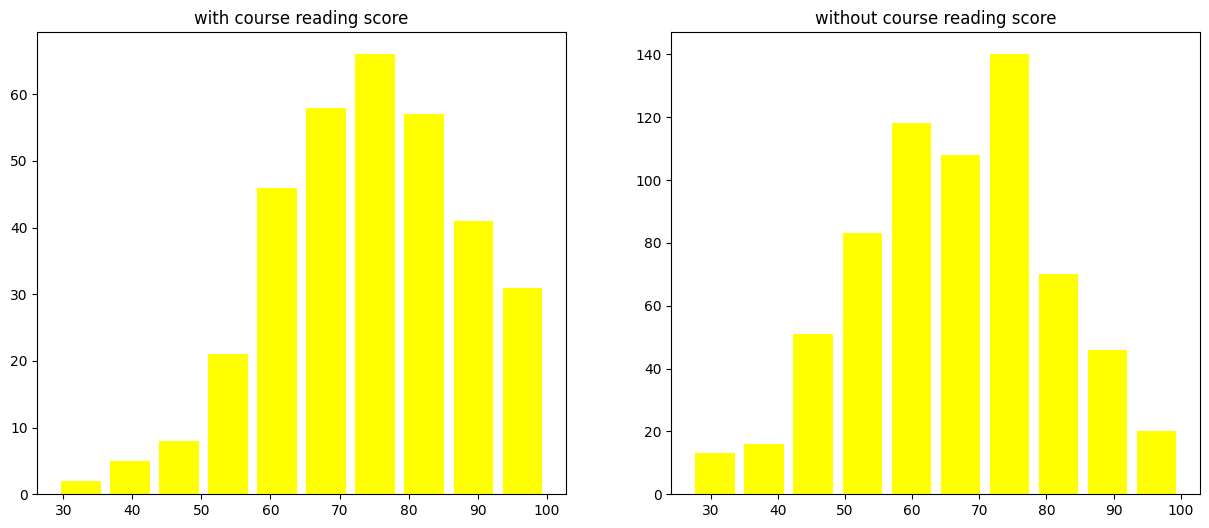

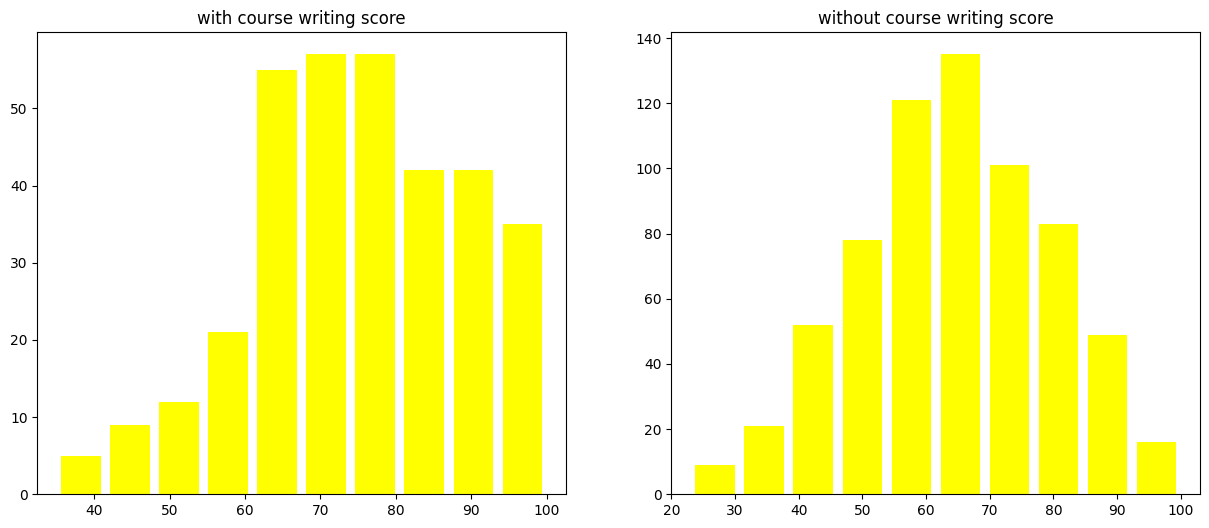

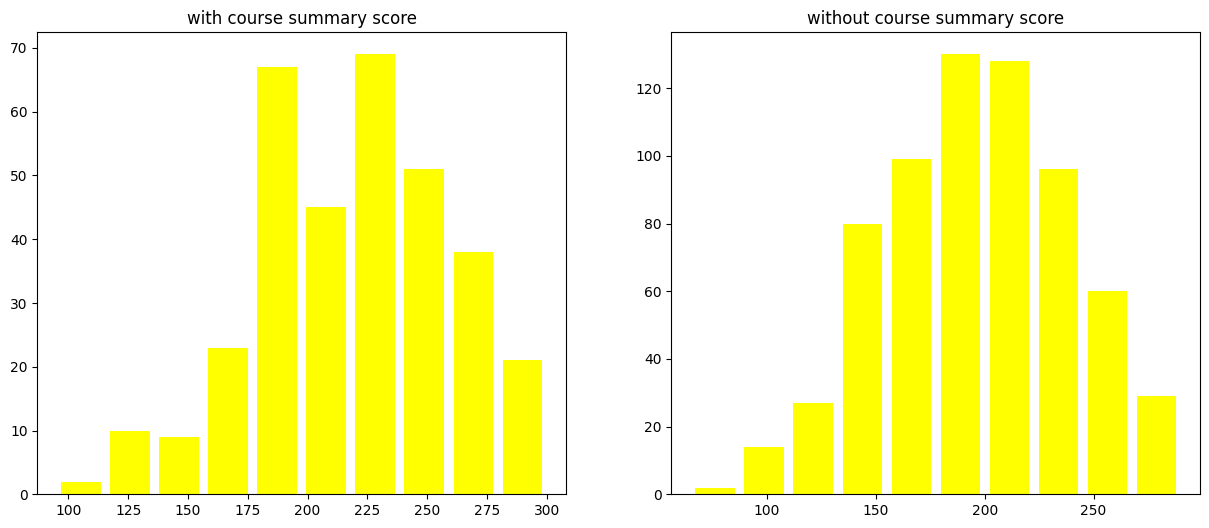

In [126]:
# (№2b) Построить гистограмму для признака с баллами в зависимости от прохождения курса

comp_scores = data[data['test preparation course'] == 'completed']
none_scores = data[data['test preparation course'] == 'none']
for quality in qualities:
    table = pd.DataFrame(index=['completed', 'none', 'total'], columns=parsed_data[quality]['values'])
    table_exp = pd.DataFrame(index=['completed', 'none'])
    plt.subplots(1, 2, figsize=(15,6))
    plt.subplot(1, 2, 1)
    plt.hist(comp_scores[quality], align='mid', rwidth=0.8, color='yellow', stacked=True, histtype='bar')
    plt.title(f'with course {quality}')
    plt.subplot(1, 2, 2)
    plt.hist(none_scores[quality], align='mid', rwidth=0.8, color='yellow', stacked=True, histtype='bar')
    plt.title(f'without course {quality}')
    # Проверить гипотезу об одинаковой распределенности (с помощью критерия хи-квадрат)
    for i in range(len(comp_scores[quality])):
        if isnan(table[comp_scores[quality].iloc[i]]['completed']):
            table[comp_scores[quality].iloc[i]]['completed'] = 1
            if isnan(table[comp_scores[quality].iloc[i]]['none']):
                table[comp_scores[quality].iloc[i]]['total'] = 1
            continue
        table[comp_scores[quality].iloc[i]]['completed'] += 1
        table[comp_scores[quality].iloc[i]]['total'] += 1
    for i in range(len(none_scores[quality])):
        if isnan(table[none_scores[quality].iloc[i]]['none']):
            table[none_scores[quality].iloc[i]]['none'] = 1
            if isnan(table[none_scores[quality].iloc[i]]['completed']):
                table[none_scores[quality].iloc[i]]['total'] = 1
            else:
                table[none_scores[quality].iloc[i]]['total'] += 1
            continue
        table[none_scores[quality].iloc[i]]['none'] += 1
        table[none_scores[quality].iloc[i]]['total'] += 1
    table = table.replace(np.nan, 0)
    temp = pd.DataFrame.from_dict({'completed': len(comp_scores[quality]),'none': len(none_scores[quality]), 'total': 1000}, columns=['total'], orient='index')
    table = pd.concat([table, temp], axis=1)
    table
    table_exp = pd.DataFrame(index=table.index, columns=table.columns)
    chi2_test = 0
    for column in table_exp:
        for i in range(len(table_exp) - 1):
            table_exp[column][i] = table[column]['total'] * table['total']['completed' if i == 0 else 'none'] / table['total']['total']
            chi2_test += (table[column][i] - table_exp[column][i])**2 / table_exp[column][i]
    quantile = stats.chi2.ppf(1 - .05, df=(1000-1)*(2-1)) # уровня 0.05
    print(quality, 'Отвергаем' if chi2_test <= quantile else 'Не отвергаем')

,math score,reading score,writing score,summary score
median,66.500,70.000,68.000,202.000
mean,66.396,69.002,67.738,203.136


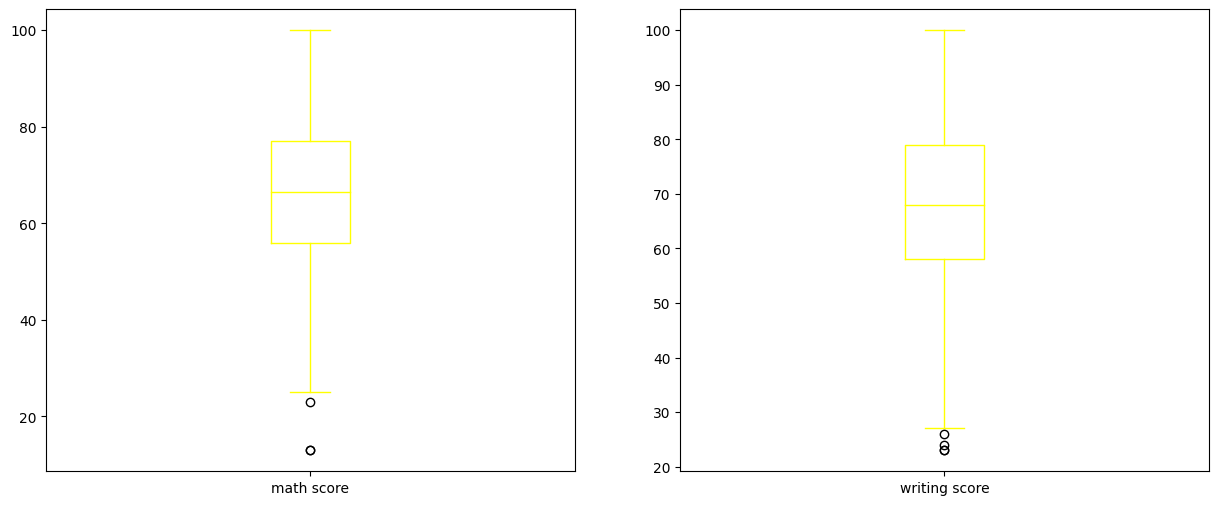

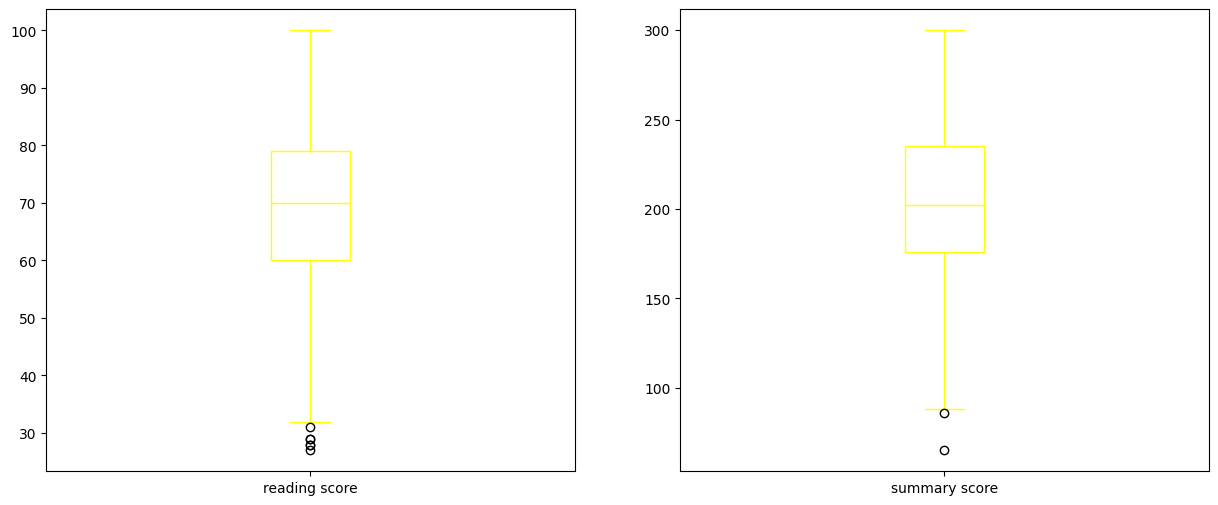

In [127]:
# (№3) Построить box-plot (ящик с усами) для 4-х признаков
# (№4) Вывести для каждого из 4-х признаков выборочное среднее и медиану

plt.subplots(1, 2, figsize=(15,6))
plt.subplot(1, 2, 1)
data.boxplot(column=['math score'], grid= False, color='yellow')
plt.subplot(1, 2, 2)
data.boxplot(column=['writing score'], grid= False, color='yellow')
plt.subplots(1, 2, figsize=(15, 6))
plt.subplot(1, 2, 1)
data.boxplot(column=['reading score'], grid= False, color='yellow')
plt.subplot(1, 2, 2)
data.boxplot(column=['summary score'], grid= False, color='yellow')

qualities = ['math score', 'reading score', 'writing score', 'summary score']
middle_df = pd.DataFrame(index=['median', 'mean'])
for quality in qualities:
    temp = pd.DataFrame.from_dict({'median': result_data[quality]['median'], 'mean': result_data[quality]['mean']}, columns=[quality], orient='index')
    middle_df = pd.concat([middle_df, temp], axis=1)

# В каждом из признаков имеются выбросы. Аномалий в данных не наблюдается.
# Их наличие вызвано различным уровнем подготовки / условиями подготовки / жизненными условиями каждого
# студента в отдельности. В целом, наличие низкого балла за экзамен может говорить о умственных способностях,
# умения списывать или, наоборот, принципиальность в вопросе списывания.

# Медианы и средние признаков math, reading, writing score входят в окрестность числа 65

middle_df

In [128]:
# (№5) Распределения каждого признака?
# Проверим гипотезу о том, что каждый из 4-х признаков, связанный с результатами экзамена
# имеет нормальное распределение

for quality in qualities:
    st, pv = stats.kstest(data[quality], 'norm')
    print(quality, ':', pv, ', т.е. не является нормальным распределением')

math score : 0.0 , т.е. не является нормальным распределением
reading score : 0.0 , т.е. не является нормальным распределением
writing score : 0.0 , т.е. не является нормальным распределением
summary score : 0.0 , т.е. не является нормальным распределением


Коэффициент Корреляции Пирсона
Пара 1: 9.72062150473995e-12
Пара 2: 0.0 , т.е. нет корреляции


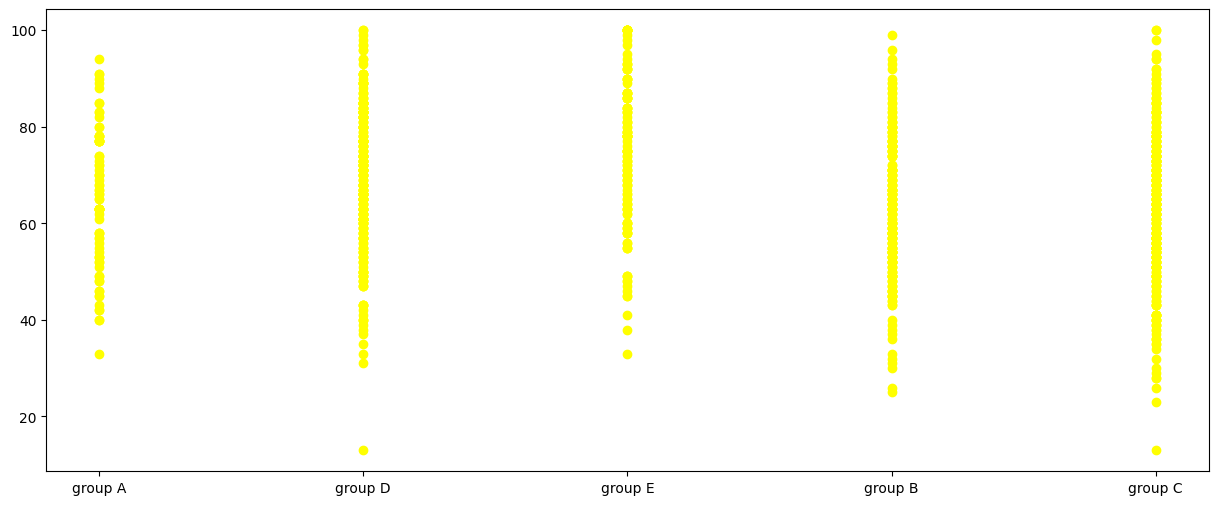

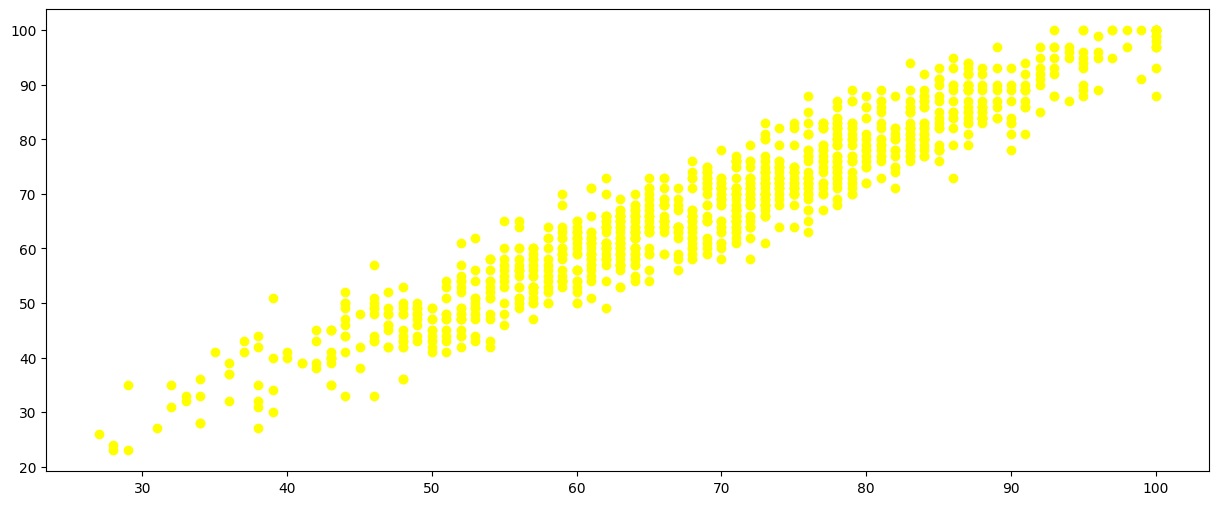

In [129]:
# (№6) Scatter-plot для пар признаков
plt.subplots(1, 1, figsize=(15,6))
plt.scatter(data['race/ethnicity'], data['math score'], color='yellow')
types = ['group A', 'group B', 'group C', 'group D', 'group E']
new_data = np.array(list(map(lambda a: types.index(a), data['race/ethnicity'])))
st, pv = stats.pearsonr(new_data, data['math score'])
print('Коэффициент Корреляции Пирсона')
print('Пара 1:', pv)
plt.subplots(1, 1, figsize=(15,6))
plt.scatter(data['reading score'], data['writing score'], color='yellow')
st, pv = stats.pearsonr(data['reading score'], data['writing score'])
print('Пара 2:', pv, ', т.е. нет корреляции')